In [1]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)


import math
from IPython.display import display, Math


In [75]:
%matplotlib inline
def generate_triangle_plot_multi(data_path_array, params, sample_label, full_comparison_settings = False, conc_diff = False):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    settings = {
        "mult_bias_correction_order": 1,
        "smooth_scale_2D": 3,   # try 4–10
        "smooth_scale_1D": 2,   # try 2–6
        "boundary_correction_order": 1,
    }
    samples_array = []
    for data_path in data_path_array:
        data_c = [read_input(data_path)][0]
        names = [param[0] for param in params]
        labels = [rf"{param[0]}" for param in params]
        fiducial_values = {param[0]: param[1] for param in params}
        data_so = np.array([[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]])
        if f"\sigma_0" in names:
            sigma_index = names.index(f"\sigma_0")
            mask = data_so[:, sigma_index] >= 0.15
            before = len(data_so)
            data_so = data_so[mask]
            after = len(data_so)
            print(f"Filtered sigma_0 < 0.1: removed {before - after} samples")
        sample_red = MCSamples(samples=np.array(data_so), names=names, labels=labels, settings=settings)
        sample_red.removeBurn(0.4)
        samples_array.append(sample_red)
    for sample_i in samples_array:
        (sample_i.samples)
        print(len(sample_i.samples), " samples")
    # Triangle plot
    print(f"HEREEE {names}")
    g = plots.get_subplot_plotter()
    range_ = {f'\\mu_1':[0.0,2.0]}
    if full_comparison_settings:
        if conc_diff:
            g.settings.axes_fontsize = 12
            g.settings.line_styles = ['#e41a1c', '#377eb8', '#e41a1c', '#377eb8']
            g.triangle_plot(
            samples_array,
            legend_labels=sample_label,
            filled=[False, False, False, False],
            contour_ls=["--", "--", "-", "-"],
            contour_lws=[2, 2, 2, 1.2, 1.2, 1.2],
            colors=['#e41a1c', '#377eb8', '#e41a1c', '#377eb8'],
            alphas=[.7, .7, .7, 0.4, 0.4, 0.4],
            fine_bins=1,
            markers=fiducial_values,
            param_limits=range_
            )
        else:
            g.settings.axes_fontsize = 12
            g.settings.line_styles = ['#e41a1c', '#377eb8', '#4daf4a', '#e41a1c', '#377eb8', '#4daf4a']
            g.triangle_plot(
            samples_array,
            legend_labels=sample_label,
            filled=[False, False, False, False, False, False],
            contour_ls=["--", "--", "-", "-", "-", "-"],
            contour_lws=[2, 2, 2, 1.2, 1.2, 1.2],
            colors=['#e41a1c', '#377eb8', '#4daf4a', '#e41a1c', '#377eb8', '#4daf4a'],
            alphas=[.7, .7, .7, 0.4, 0.4, 0.4],
            fine_bins=1,
            markers=fiducial_values,
            param_limits=range_
            )
    else:
        g.triangle_plot(
            samples_array,
            legend_labels=sample_label,
            filled=False,
            alphas=[0.7, 0.55],
            contour_ls=["--","-","-"],
            contour_lws=2,
            fine_bins=1,
            marker_args={"linewidth": 4},
            markers=fiducial_values,
            param_limits=range_
        )
    #plt.savefig(f'{data_path.replace('number_counts_samples.txt','triangle_plot.png')}')
    plt.show()

    # for param_name in names:
    #     display(Math(sample_red.getInlineLatex(param_name, limit=1)))

# Iterate through each sample chain
    for i, sample_i in enumerate(samples_array):
        print(f"\n--- {sample_label[i]} ---")
        
        # Get the list of parameter names actually present in this chain
        existing_params = sample_i.getParamNames().list()
        
        for param_name in names:
            if param_name in existing_params:
                # Fetch the LaTeX result (e.g., "0.22 \pm 0.01")
                latex_val = sample_i.getInlineLatex(param_name, limit=1)
                # Fetch the pretty label (e.g., "\Omega_c")
                pretty_label = sample_i.getParamNames().parWithName(param_name).label
                
                display(Math(rf"{pretty_label}: {latex_val}"))
    return data_so

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18375/1133476208.py:24: SyntaxWarning: invalid escape sequence '\s'
  if f"\sigma_0" in names:
/tmp/ipykernel_18375/1133476208.py:25: SyntaxWarning: invalid escape sequence '\s'
  sigma_index = names.index(f"\sigma_0")


## 7 cases

We will analyze 7 cases indivually first:
- Cosmodc2 halos with generated richness. Cluster counts only
- Cosmodc2 Redmapper with fixed concentration
  - Cluster counts
  - Lensing
  - Cluster counts + lensing
- Cosmodc2 Redmapper with varying concentration
  - Cluster counts
  - Lensing
  - CLuster counts + lensing

### Cosmodc2 Halos

<>:18: SyntaxWarning: invalid escape sequence '\O'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\O'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\O'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\O'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid e

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
24000  samples
HEREEE ['\\Omega_c', '\\sigma_8']


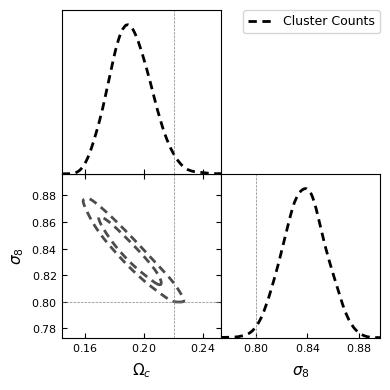


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 17234 samples
Removed no burn in
52660  samples
HEREEE ['\\mu_0', '\\mu_1', '\\mu_2', '\\sigma_0']


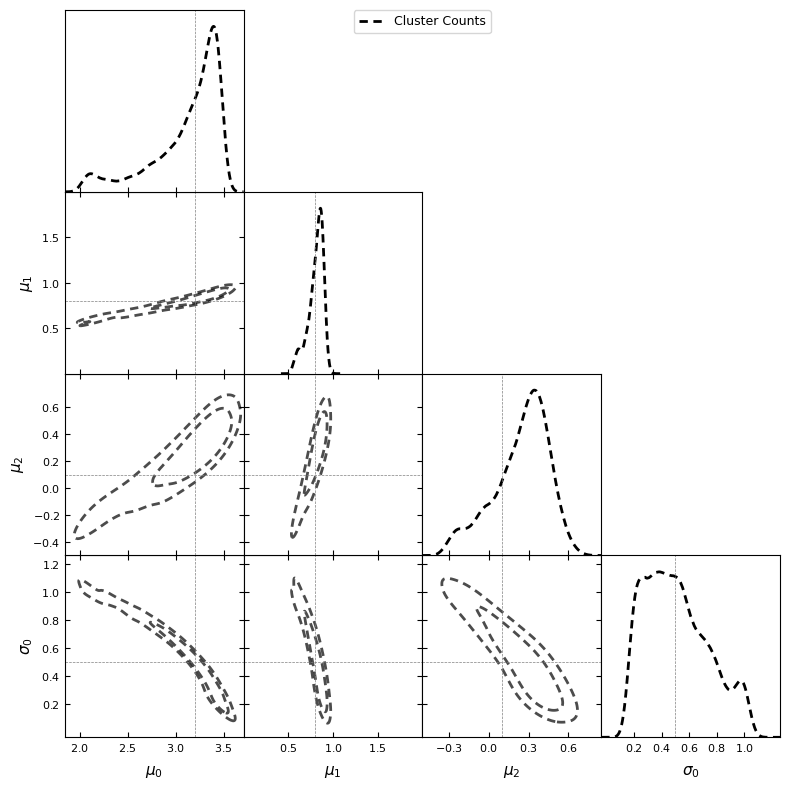


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 1427 samples
Removed no burn in
23144  samples
HEREEE ['\\Omega_c', '\\sigma_8', '\\mu_0', '\\mu_1', '\\sigma_0']


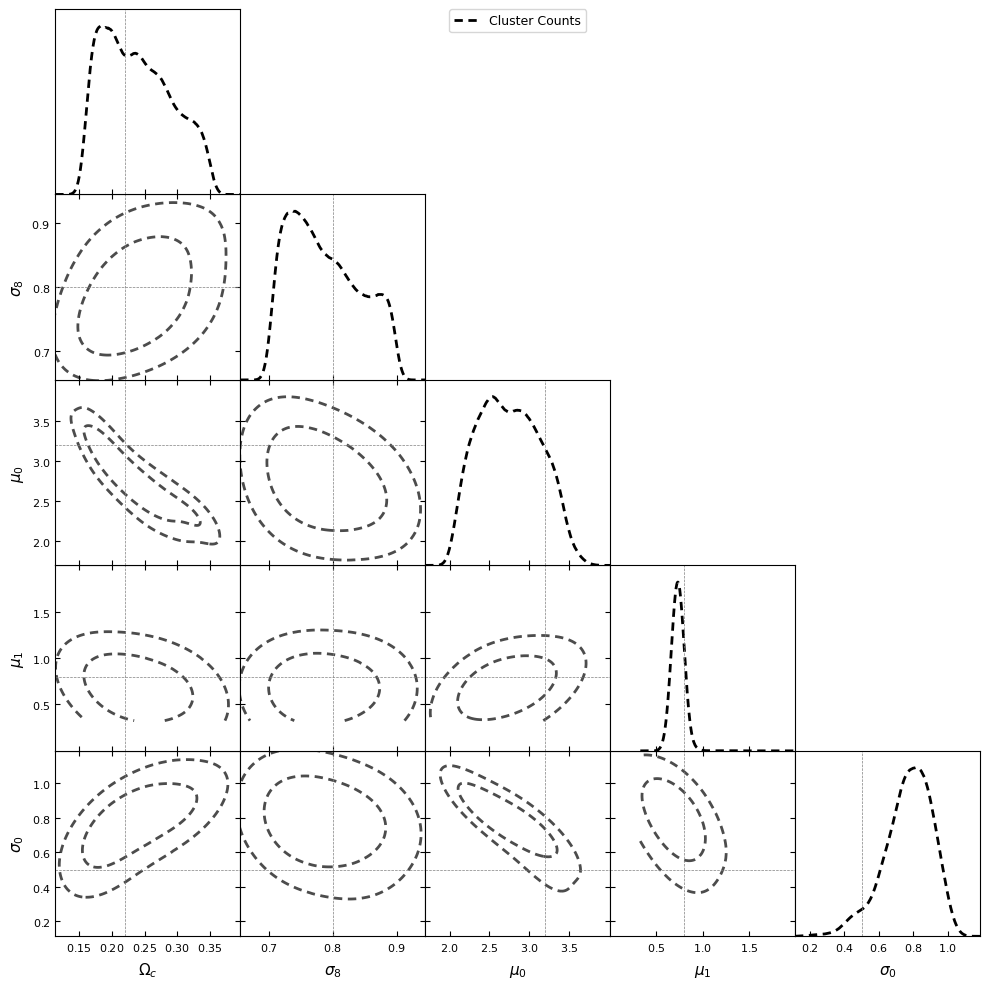


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [74]:
### Change the home path to yours
dir_halo   = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_halos'
suffix_cosmo      = 'outputs_cosmo/output_rp/number_counts_samples.txt'
suffix_mor      = 'outputs_mor/output_rp/number_counts_samples.txt'
suffix_both      = 'outputs_both/output_rp/number_counts_samples.txt'

path_halos_cosmo = f'{dir_halo}/{suffix_cosmo}'
path_halos_mor = f'{dir_halo}/{suffix_mor}'
path_halos_both = f'{dir_halo}/{suffix_both}'

# Labels matched to the new order
labels = [
    "Cluster Counts", 
]

data_cosmo = generate_triangle_plot_multi(
    [path_halos_cosmo], 
    [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8)], 
    labels
)

data_mor = generate_triangle_plot_multi(
    [path_halos_mor], 
        [(f"\mu_0",3.2),
    (f"\mu_1",0.8),
    (f"\mu_2", 0.1),
  (f"\sigma_0",  0.5)], 
    labels
)

data_both = generate_triangle_plot_multi(
    [path_halos_both], 
    [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8),
    (f"\mu_0",3.2),
    (f"\mu_1",0.8),
  (f"\sigma_0",  0.5)], 
    labels
)

## Cosmodc2 Redmapper Fixed Concentration

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\O'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid e

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_lensing/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
30000  samples
41400  samples
39000  samples
HEREEE ['\\Omega_c', '\\sigma_8']


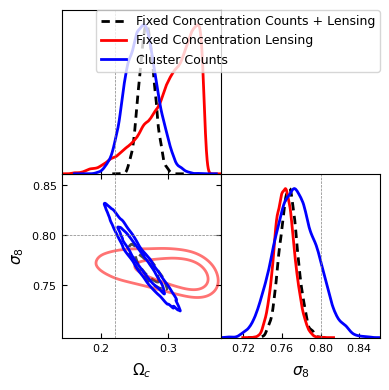


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 3398 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 4347 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 5376 samples
Removed no burn in
29761  samples
36992  samples
40574  samples
HEREEE ['\\mu_0', '\\mu_1', '\\mu_2', '\\sigma_0']


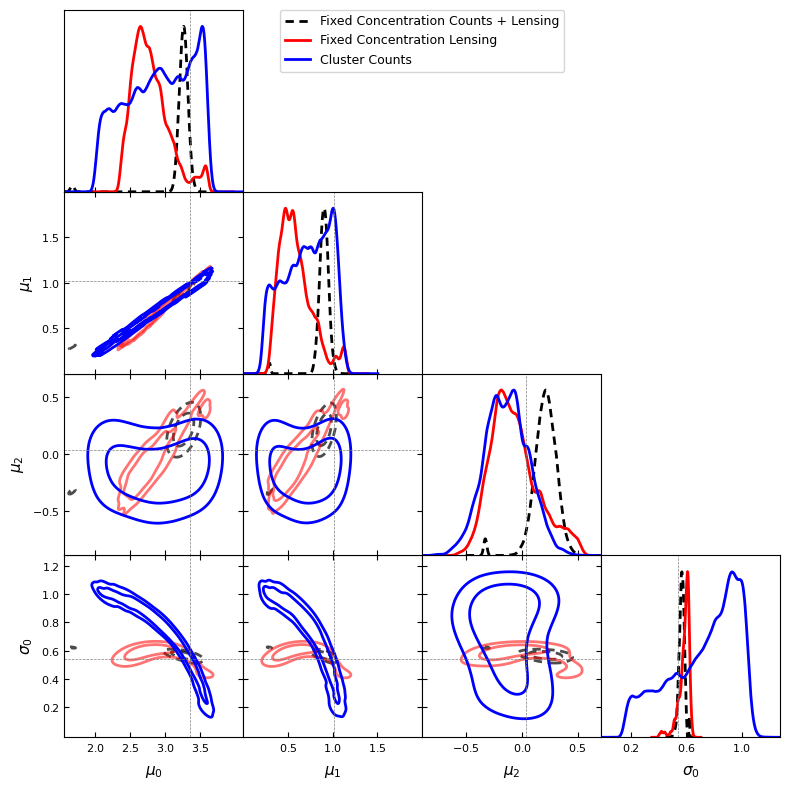


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 3528 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_lensing/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 1993 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2670 samples
Removed no burn in
29683  samples
49804  samples
42198  samples
HEREEE ['\\Omega_c', '\\sigma_8', '\\mu_0', '\\mu_1', '\\sigma_0']


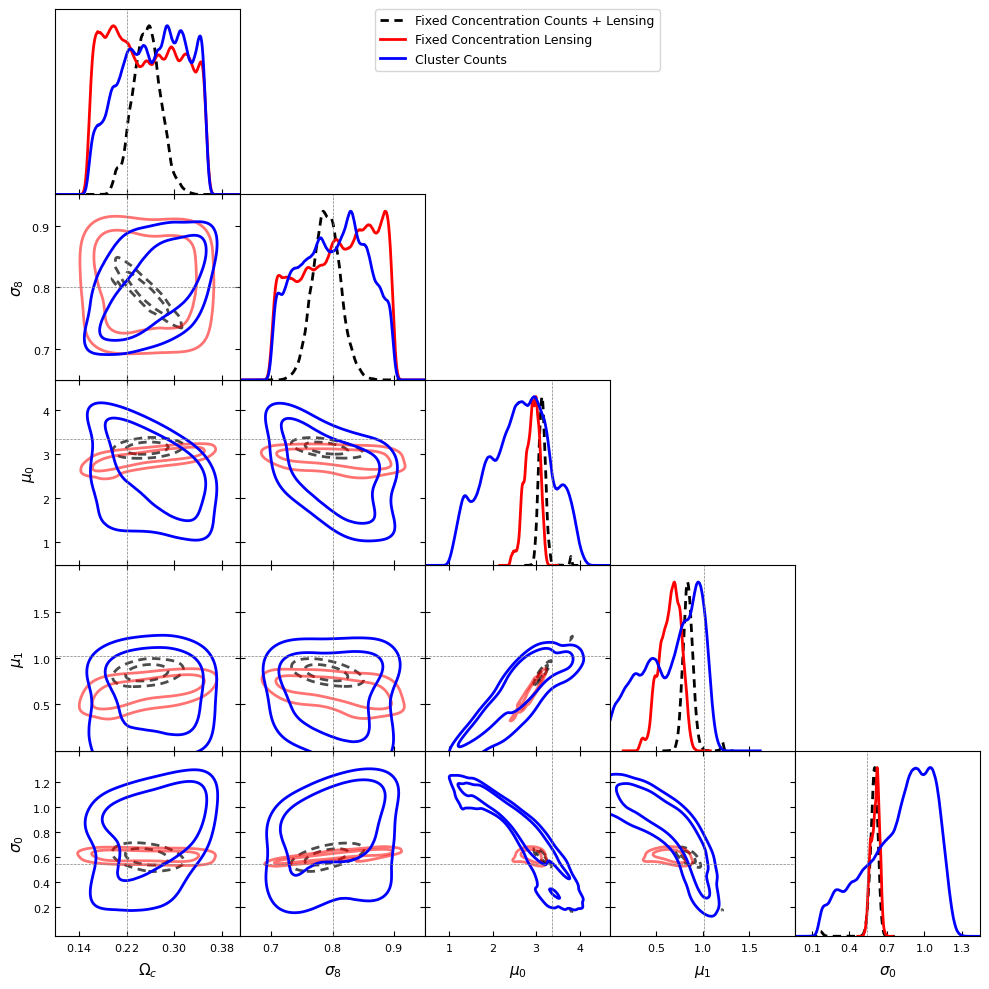


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [77]:
### Change the home path to yours
# Directory mapping for clarity
dir_fixed = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration/'
suffix      = 'outputs_cosmo/output_rp/number_counts_samples.txt'


path_redmapper_fixedc_lensing_cosmo = f'{dir_fixed}/cosmodc2_redmapper_lensing/{suffix_cosmo}'
path_redmapper_fixedc_lensing_mor = f'{dir_fixed}/cosmodc2_redmapper_lensing/{suffix_mor}'
path_redmapper_fixedc_lensing_both = f'{dir_fixed}/cosmodc2_redmapper_lensing/{suffix_both}'

path_redmapper_fixedc_counts_cosmo = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix_cosmo}'
path_redmapper_fixedc_counts_mor = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix_mor}'
path_redmapper_fixedc_counts_both = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix_both}'

path_redmapper_fixedc_full_cosmo = f'{dir_fixed}/cosmodc2_redmapper_full_analysis/{suffix_cosmo}'
path_redmapper_fixedc_full_mor = f'{dir_fixed}/cosmodc2_redmapper_full_analysis/{suffix_mor}'
path_redmapper_fixedc_full_both = f'{dir_fixed}/cosmodc2_redmapper_full_analysis/{suffix_both}'


paths_cosmo_fixed = [path_redmapper_fixedc_full_cosmo, path_redmapper_fixedc_lensing_cosmo, path_redmapper_fixedc_counts_cosmo]
paths_mor_fixed = [path_redmapper_fixedc_full_mor, path_redmapper_fixedc_lensing_mor, path_redmapper_fixedc_counts_mor]
paths_both_fixed = [path_redmapper_fixedc_full_both, path_redmapper_fixedc_lensing_both, path_redmapper_fixedc_counts_both]

# Labels matched to the new order
labels = [ 
    "Fixed Concentration Counts + Lensing", 
    "Fixed Concentration Lensing", 
    "Cluster Counts"
]
params_mor_fixed = [
    (f"\mu_0", 3.35),
    (f"\mu_1", 1.02),
    (f"\mu_2", 0.037),
    (f"\sigma_0", 0.54),
]


params_both_fixed = [(f"\Omega_c", 0.22), 
    (f"\sigma_8", 0.8),
    (f"\mu_0", 3.35),
    (f"\mu_1", 1.02),
    (f"\sigma_0", 0.54),
]


data = generate_triangle_plot_multi(
    paths_cosmo_fixed, 
    [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8)], 
    labels
)


data = generate_triangle_plot_multi(
    paths_mor_fixed, 
    params_mor_fixed, 
    labels
)


data = generate_triangle_plot_multi(
    paths_both_fixed, 
    params_both_fixed, 
    labels
)

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\O'
<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid e

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
30000  samples
42000  samples
39000  samples
HEREEE ['\\Omega_c', '\\sigma_8', 'Conc']


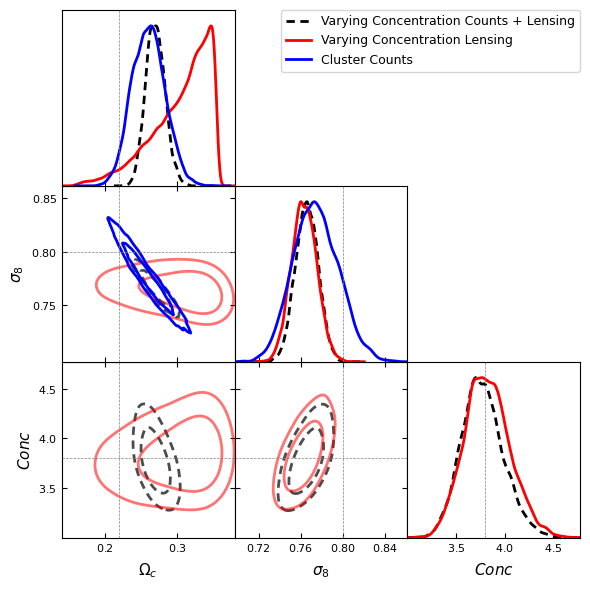


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 380 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 27 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 5376 samples
Removed no burn in
30372  samples
37784  samples
40574  samples
HEREEE ['\\mu_0', '\\mu_1', '\\mu_2', '\\sigma_0', 'Conc']


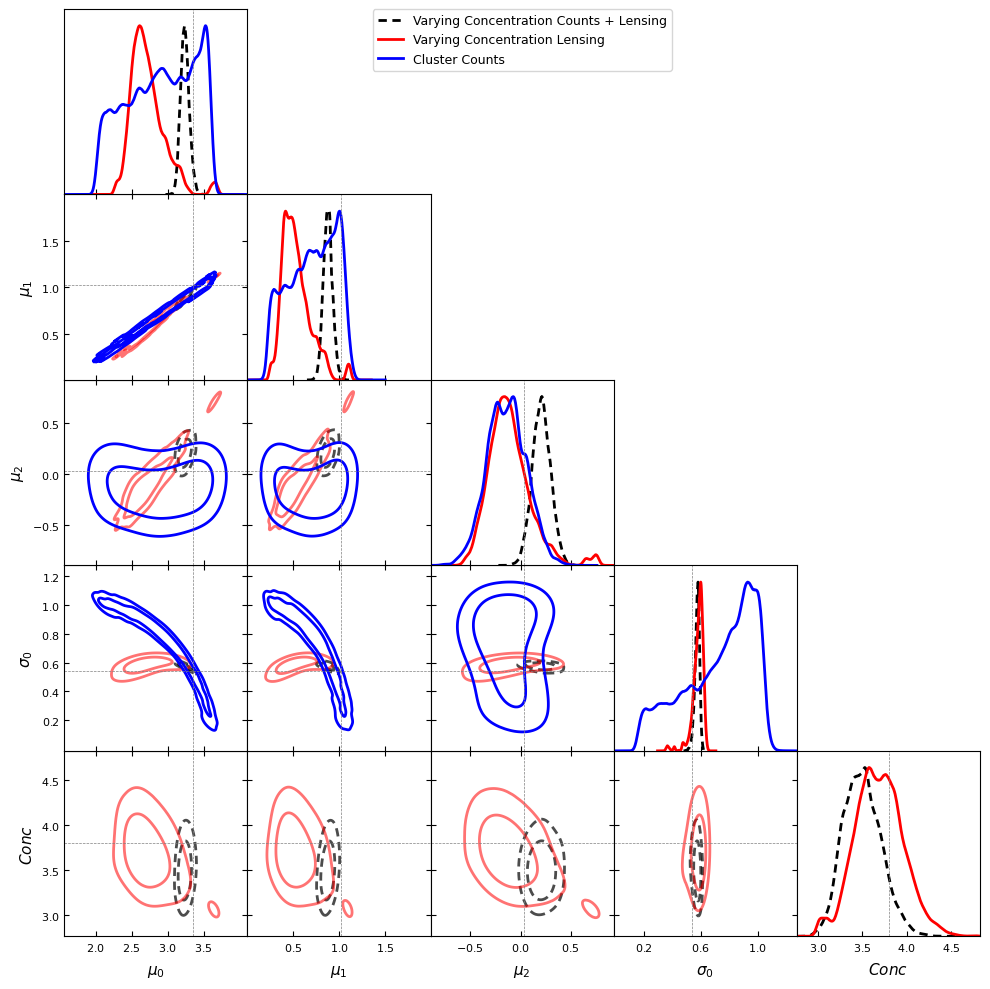


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2205 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2031 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2670 samples
Removed no burn in
30477  samples
49181  samples
42198  samples
HEREEE ['\\Omega_c', '\\sigma_8', '\\mu_0', '\\mu_1', '\\sigma_0', 'Conc']


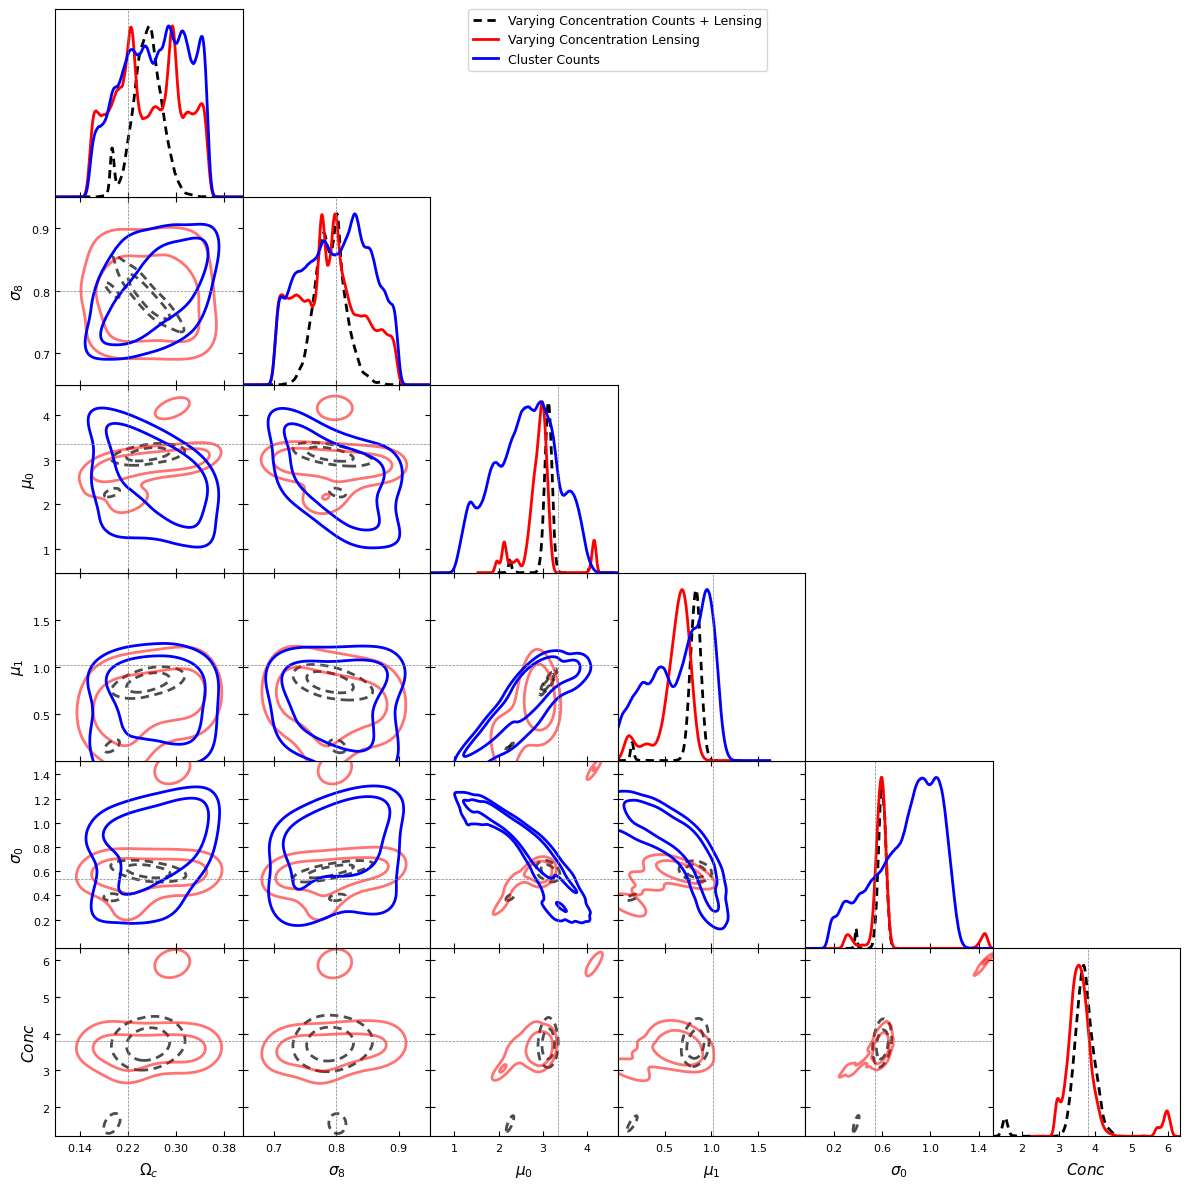


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [78]:
### Change the home path to yours
# Directory mapping for clarity
dir_varying = '/sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration/'
suffix      = 'outputs_cosmo/output_rp/number_counts_samples.txt'


path_redmapper_varyingc_lensing_cosmo = f'{dir_varying}/cosmodc2_redmapper_lensing/{suffix_cosmo}'
path_redmapper_varyingc_lensing_mor = f'{dir_varying}/cosmodc2_redmapper_lensing/{suffix_mor}'
path_redmapper_varyingc_lensing_both = f'{dir_varying}/cosmodc2_redmapper_lensing/{suffix_both}'

path_redmapper_varyingc_counts_cosmo = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix_cosmo}'
path_redmapper_varyingc_counts_mor = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix_mor}'
path_redmapper_varyingc_counts_both = f'{dir_fixed}/cosmodc2_redmapper_counts/{suffix_both}'

path_redmapper_varyingc_full_cosmo = f'{dir_varying}/cosmodc2_redmapper_full_analysis/{suffix_cosmo}'
path_redmapper_varyingc_full_mor = f'{dir_varying}/cosmodc2_redmapper_full_analysis/{suffix_mor}'
path_redmapper_varyingc_full_both = f'{dir_varying}/cosmodc2_redmapper_full_analysis/{suffix_both}'


paths_cosmo_var = [path_redmapper_varyingc_full_cosmo, path_redmapper_varyingc_lensing_cosmo, path_redmapper_varyingc_counts_cosmo]
paths_mor_var = [path_redmapper_varyingc_full_mor, path_redmapper_varyingc_lensing_mor, path_redmapper_varyingc_counts_mor]
paths_both_var = [path_redmapper_varyingc_full_both, path_redmapper_varyingc_lensing_both, path_redmapper_varyingc_counts_both]

# Labels matched to the new order
labels = [ 
    "Varying Concentration Counts + Lensing", 
    "Varying Concentration Lensing", 
    "Cluster Counts"
]
params_mor_var = [
    (f"\mu_0", 3.35),
    (f"\mu_1", 1.02),
    (f"\mu_2", 0.037),
    (f"\sigma_0", 0.54),
    ("Conc", 3.8)
]


params_both_var = [(f"\Omega_c", 0.22), 
    (f"\sigma_8", 0.8),
    (f"\mu_0", 3.35),
    (f"\mu_1", 1.02),
    (f"\sigma_0", 0.54),
    ("Conc", 3.8)
]


data = generate_triangle_plot_multi(
    paths_cosmo_var, 
    [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("Conc", 3.8)], 
    labels
)


data = generate_triangle_plot_multi(
    paths_mor_var, 
    params_mor_var, 
    labels
)


data = generate_triangle_plot_multi(
    paths_both_var, 
    params_both_var, 
    labels
)

<>:22: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18375/366423904.py:22: SyntaxWarning: invalid escape sequence '\O'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("Conc", 3.8)],
/tmp/ipykernel_18375/366423904.py:22: SyntaxWarning: invalid escape sequence '\s'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("Conc", 3.8)],


Generating Combined Cosmo Plot...
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_red

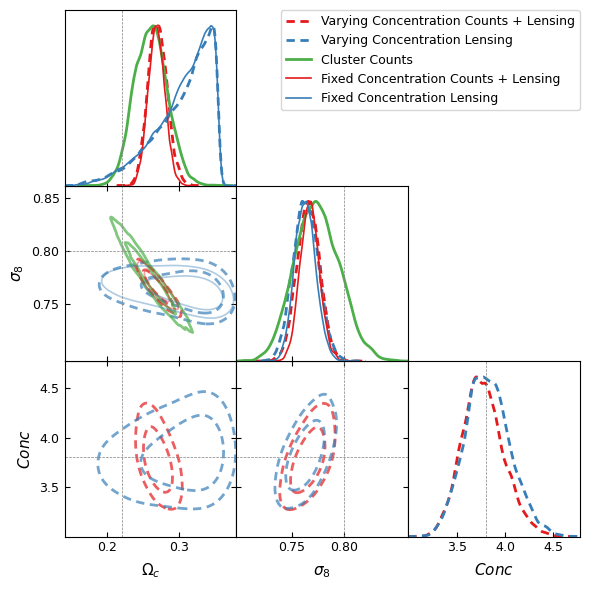


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Generating Combined MOR Plot...
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 380 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 27 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 5376 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0

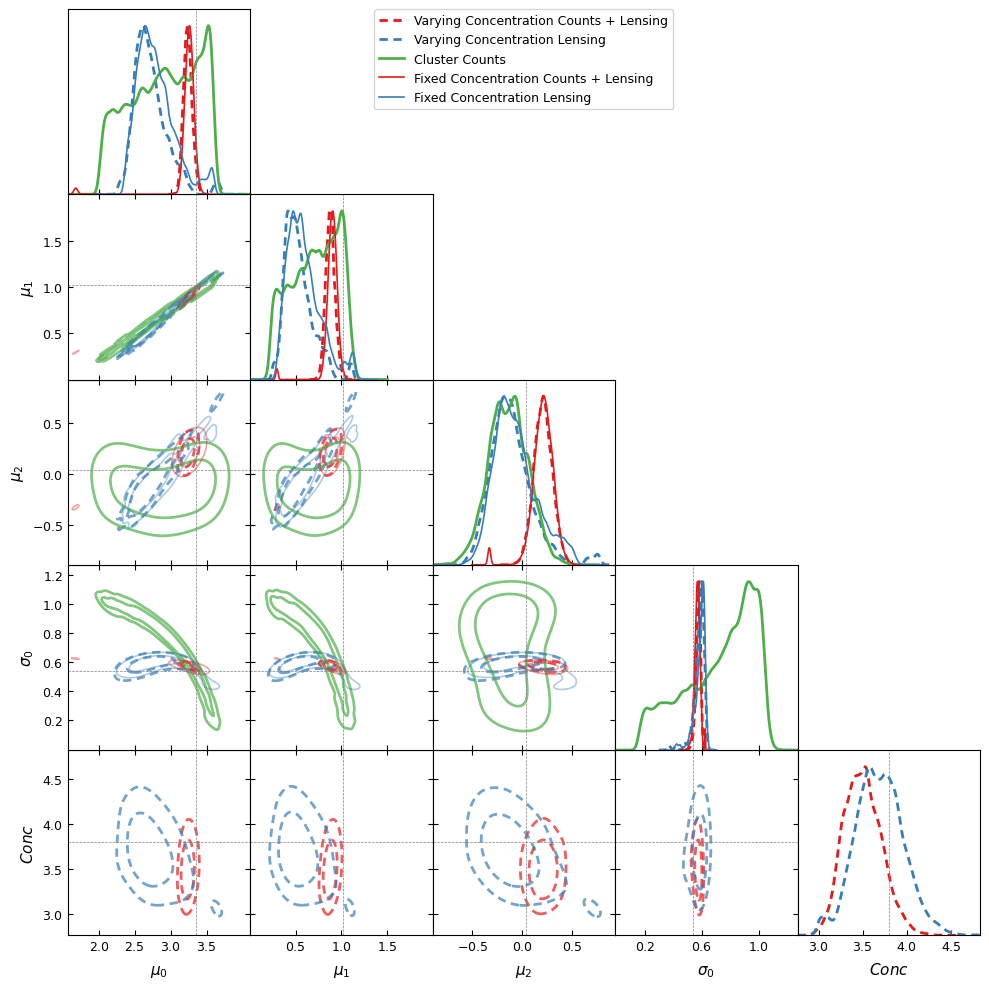


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Generating Combined 'Both' Plot...
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2205 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2031 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_counts/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2670 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_both/output_rp/number_counts_samples.txt
Filtered s

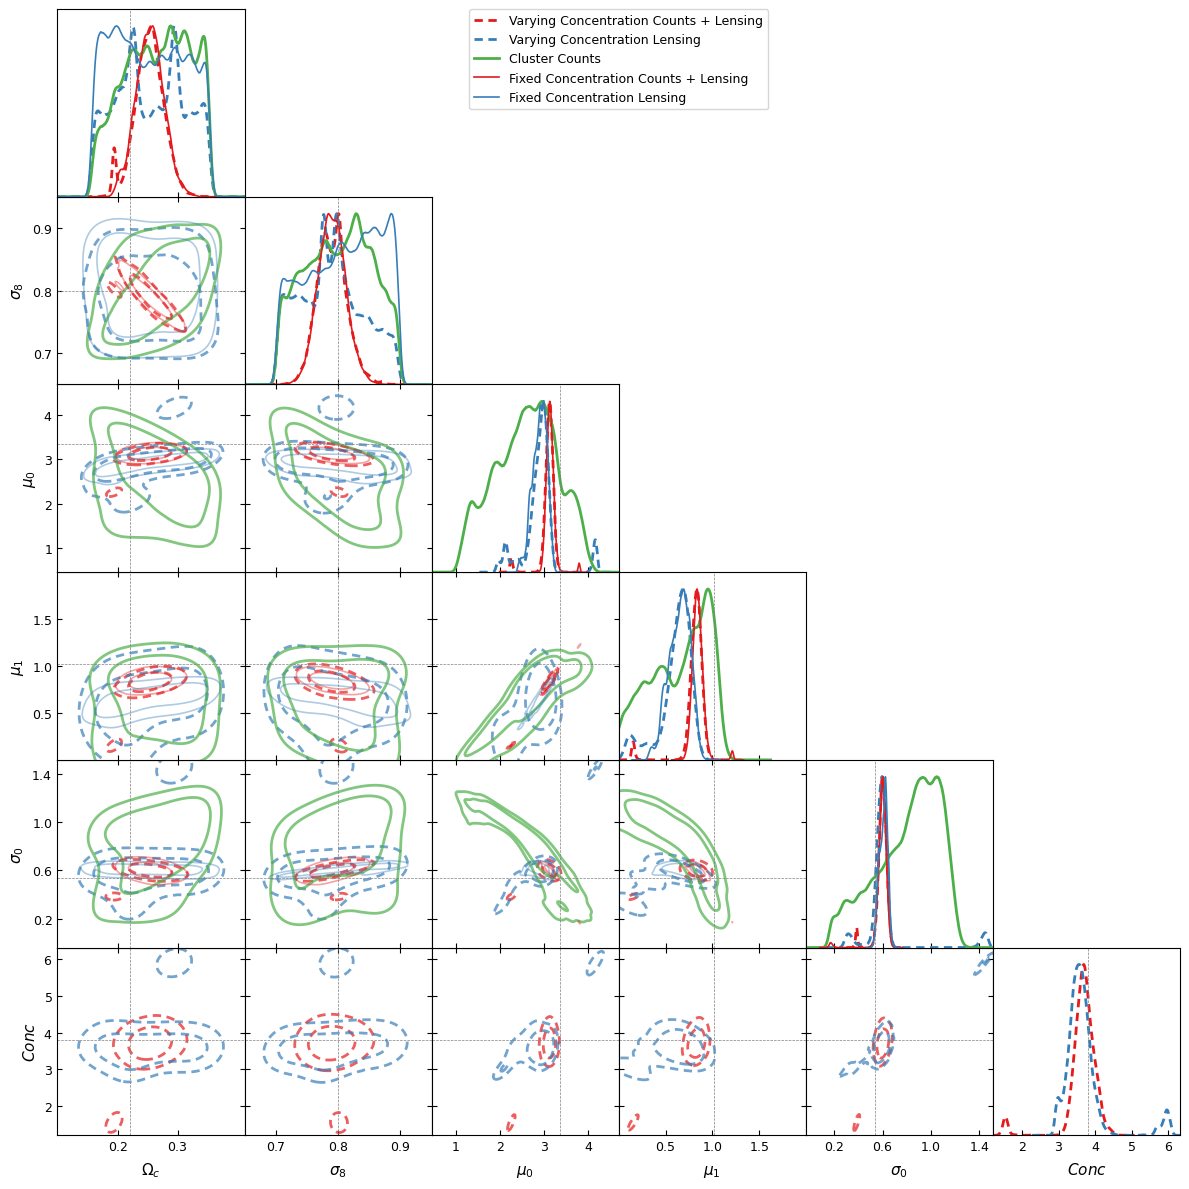


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Cluster Counts ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [79]:
# --- 1. Combine All Paths ---

paths_cosmo_fixed = [path_redmapper_fixedc_full_cosmo, path_redmapper_fixedc_lensing_cosmo]
paths_mor_fixed = [path_redmapper_fixedc_full_mor, path_redmapper_fixedc_lensing_mor]
paths_both_fixed = [path_redmapper_fixedc_full_both, path_redmapper_fixedc_lensing_both]

all_paths_cosmo = paths_cosmo_var + paths_cosmo_fixed
all_paths_mor   = paths_mor_var + paths_mor_fixed
all_paths_both  = paths_both_var + paths_both_fixed

# --- 2. Create Combined Labels ---
all_labels = [
    "Varying Concentration Counts + Lensing", "Varying Concentration Lensing", "Cluster Counts",
    "Fixed Concentration Counts + Lensing", "Fixed Concentration Lensing"
]

# --- 3. Execute Plots ---

print("Generating Combined Cosmo Plot...")
data_cosmo = generate_triangle_plot_multi(
    all_paths_cosmo, 
    [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("Conc", 3.8)], 
    all_labels,
    True
)

print("Generating Combined MOR Plot...")
data_mor = generate_triangle_plot_multi(
    all_paths_mor, 
    params_mor_var, # This list includes Conc
    all_labels,
    True
)

print("Generating Combined 'Both' Plot...")
data_both = generate_triangle_plot_multi(
    all_paths_both, 
    params_both_var, # This list includes Conc
    all_labels,
    True
)

<>:27: SyntaxWarning: invalid escape sequence '\O'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\O'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18375/2084704847.py:27: SyntaxWarning: invalid escape sequence '\O'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("Conc", 3.8)],
/tmp/ipykernel_18375/2084704847.py:27: SyntaxWarning: invalid escape sequence '\s'
  [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("Conc", 3.8)],


Generating Combined Cosmo Plot...
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_lensing/outputs_cosmo/output_rp/number_counts_samples.txt
Removed no burn in
30000  samples
42000  samples
30000  samples
41400  samples
HEREEE ['\\Omega_c', '\\sigma_8', 'Conc']


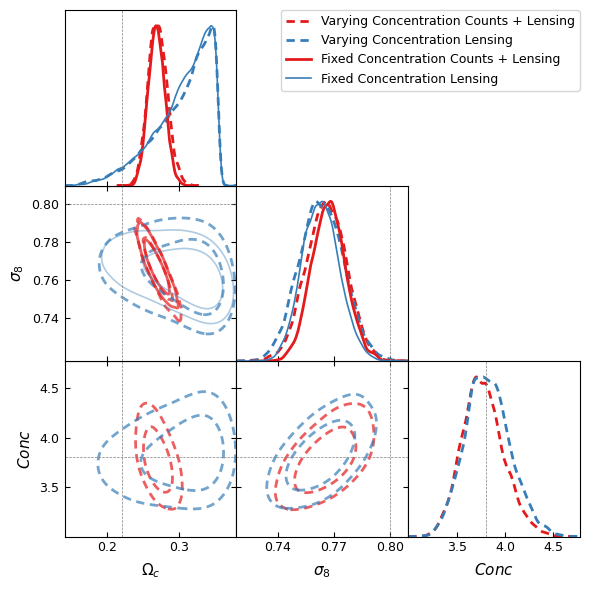


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Generating Combined MOR Plot...
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 380 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 27 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 3398 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_lensing/outputs_mor/output_rp/number_counts_samples.txt
Filtered sigma_0 < 

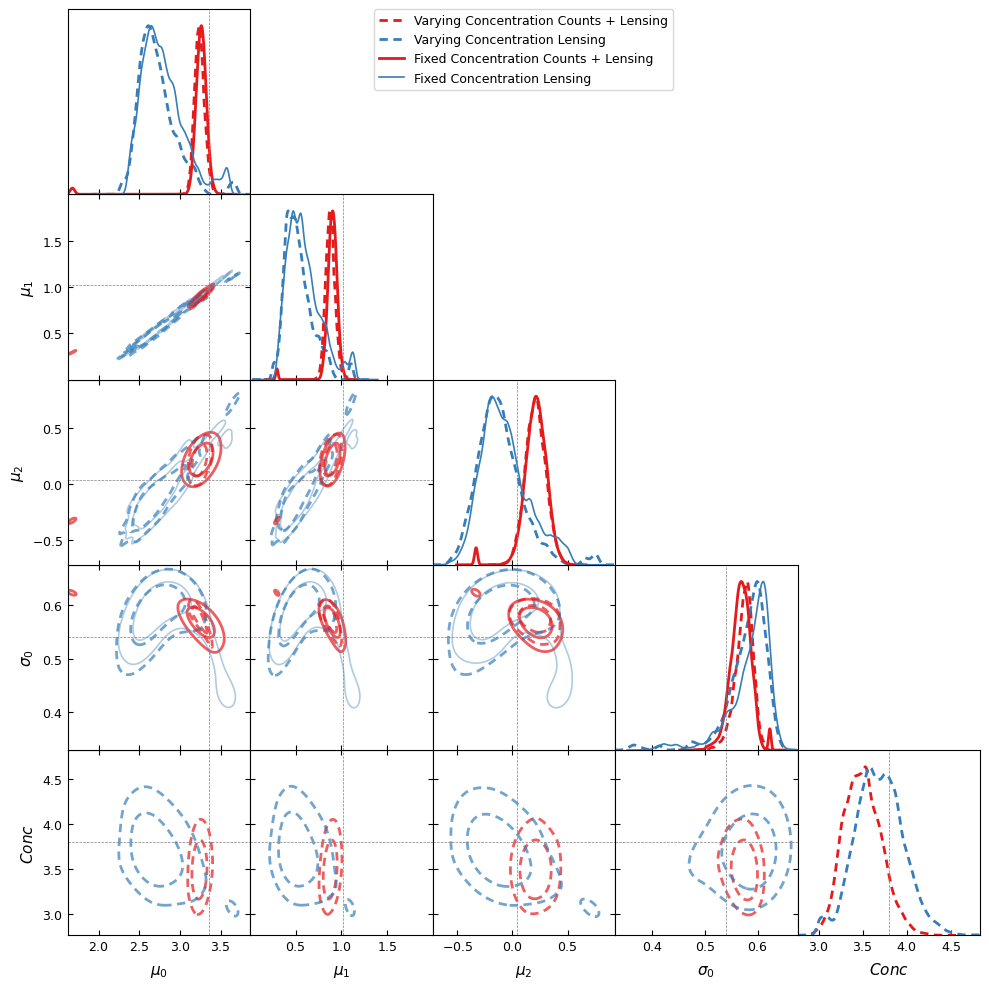


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Generating Combined 'Both' Plot...
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_full_analysis/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2205 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/varying_concentration//cosmodc2_redmapper_lensing/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 2031 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_full_analysis/outputs_both/output_rp/number_counts_samples.txt
Filtered sigma_0 < 0.1: removed 3528 samples
Removed no burn in
LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_redmapper/fixed_concentration//cosmodc2_redmapper_lensing/outputs_both/output_rp/number_counts_samples.txt
Filtered 

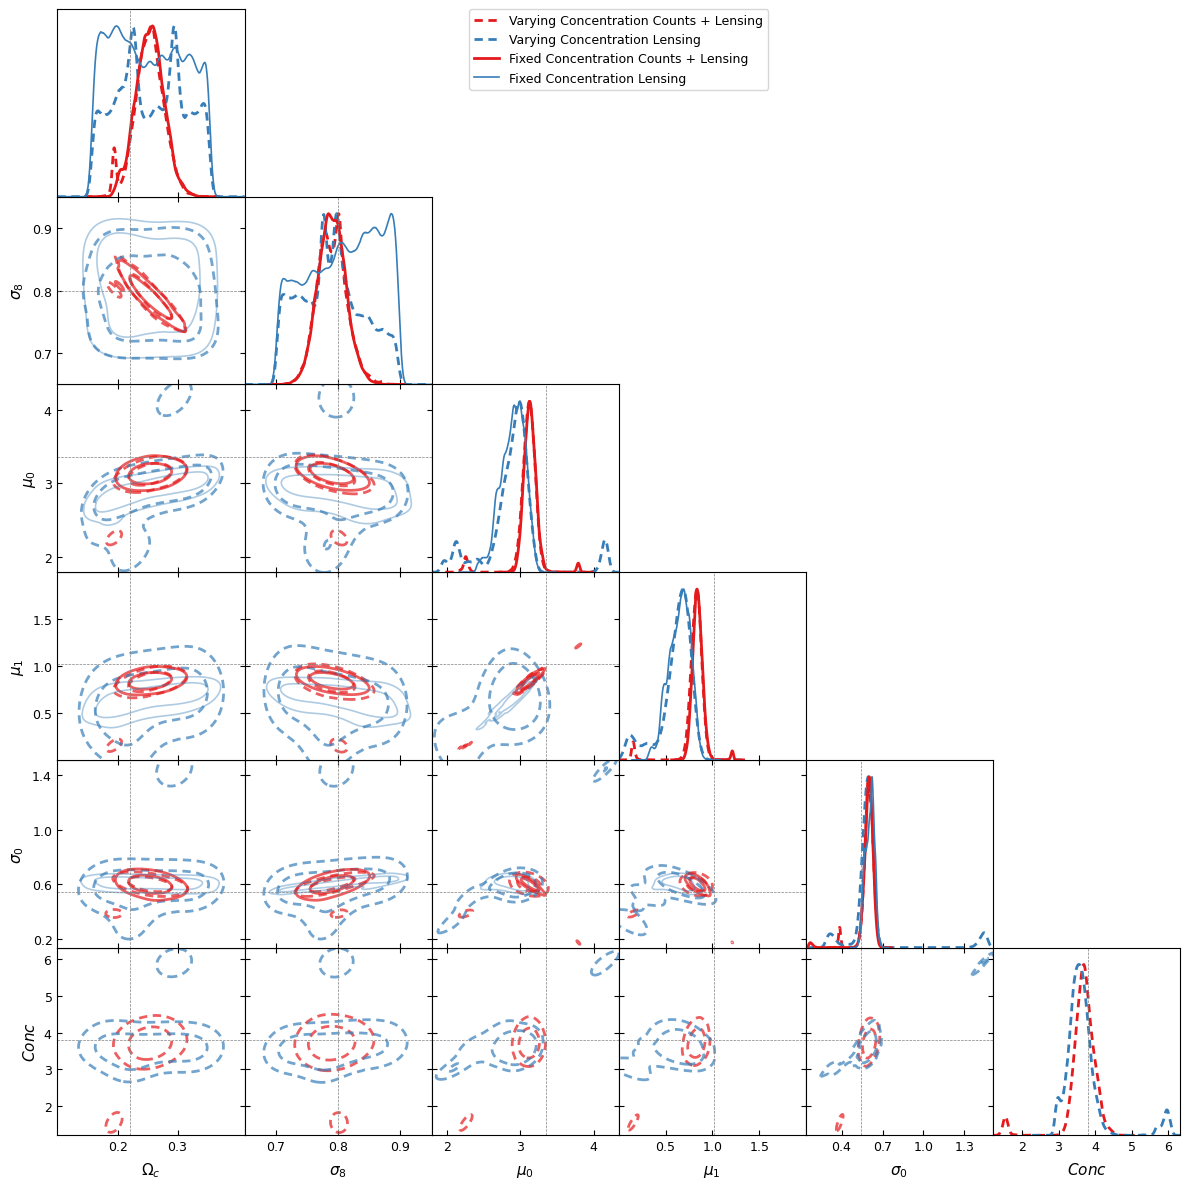


--- Varying Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Varying Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Counts + Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- Fixed Concentration Lensing ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
# --- 1. Combine All Paths ---

paths_cosmo_fixed = [path_redmapper_fixedc_full_cosmo, path_redmapper_fixedc_lensing_cosmo]
paths_mor_fixed = [path_redmapper_fixedc_full_mor, path_redmapper_fixedc_lensing_mor]
paths_both_fixed = [path_redmapper_fixedc_full_both, path_redmapper_fixedc_lensing_both]



paths_cosmo_var = [path_redmapper_varyingc_full_cosmo, path_redmapper_varyingc_lensing_cosmo ]
paths_mor_var = [path_redmapper_varyingc_full_mor, path_redmapper_varyingc_lensing_mor ]
paths_both_var = [path_redmapper_varyingc_full_both, path_redmapper_varyingc_lensing_both, ]
all_paths_cosmo = paths_cosmo_var + paths_cosmo_fixed
all_paths_mor   = paths_mor_var + paths_mor_fixed
all_paths_both  = paths_both_var + paths_both_fixed

# --- 2. Create Combined Labels ---
all_labels = [
    "Varying Concentration Counts + Lensing", "Varying Concentration Lensing",
    "Fixed Concentration Counts + Lensing", "Fixed Concentration Lensing"
]

# --- 3. Execute Plots ---

print("Generating Combined Cosmo Plot...")
data_cosmo = generate_triangle_plot_multi(
    all_paths_cosmo, 
    [(f"\Omega_c", 0.22), (f"\sigma_8", 0.8), ("Conc", 3.8)], 
    all_labels,
    True,
True
)

print("Generating Combined MOR Plot...")
data_mor = generate_triangle_plot_multi(
    all_paths_mor, 
    params_mor_var, # This list includes Conc
    all_labels,
    True,True
)

print("Generating Combined 'Both' Plot...")
data_both = generate_triangle_plot_multi(
    all_paths_both, 
    params_both_var, # This list includes Conc
    all_labels,
    True,True
)